___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# DBSCAN 

## DATA: Wholesale customers Data Set


url: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers


Attribute description:

    1) FRESH: расходы за год на свежие продукты (непрерывная переменная);
    2) MILK: расходы за год на молочные продукты (непрерывная переменная);
    3) GROCERY: расходы за год на продовольственные товары / бакалея (непрерывная переменная);
    4) FROZEN: расходы за год на замороженные продукты (непрерывная переменная)
    5) DETERGENTS_PAPER: расходы за год на моющие средства и бумажные изделия (непрерывная переменная)
    6) DELICATESSEN: расходы за год на деликатесы (непрерывная переменная);
    7) CHANNEL: канал клиента - индустрия общественного питания Horeca (отели/рестораны/кафе) или розничный канал Retail (Категориальная переменная)
    8) REGION: регион клиента - Lisnon, Oporto или Other (Категориальная переменная)
 





-----

## DBSCAN 

**View data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## Исследование данных (EDA - Exploratory Data Analysis)

**Построим зависимость между переменными MILK и GROCERY, выполняя раскраску цветами по колонке Channel.**

<Axes: xlabel='Milk', ylabel='Grocery'>

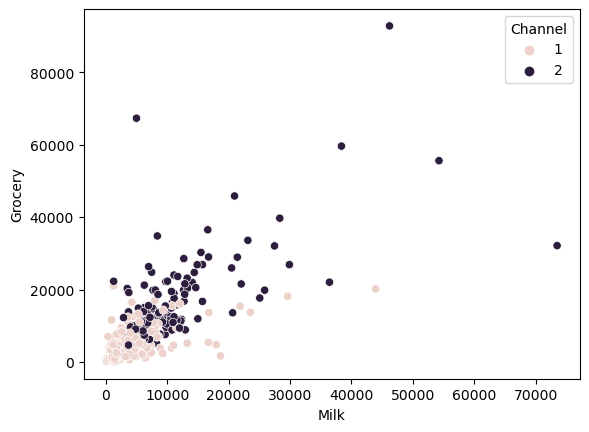

In [10]:
sns.scatterplot(data=df,  x='Milk', y='Grocery', hue='Channel')


**Построим гистограмму для колонки MILK**

<Axes: xlabel='Milk', ylabel='Count'>

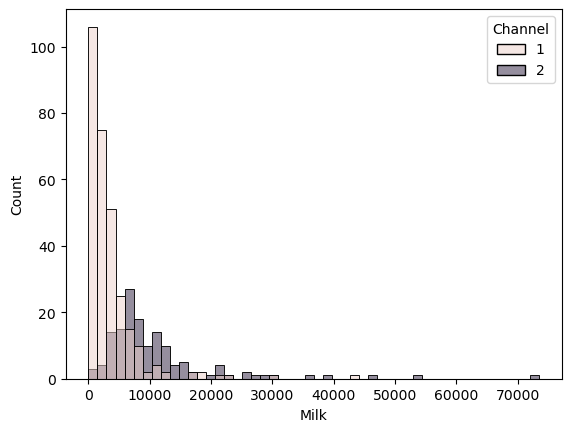

In [11]:
sns.histplot(data=df, x='Milk', hue='Channel')


**Построим график clustermap для корреляций расходов по различным категориям.**

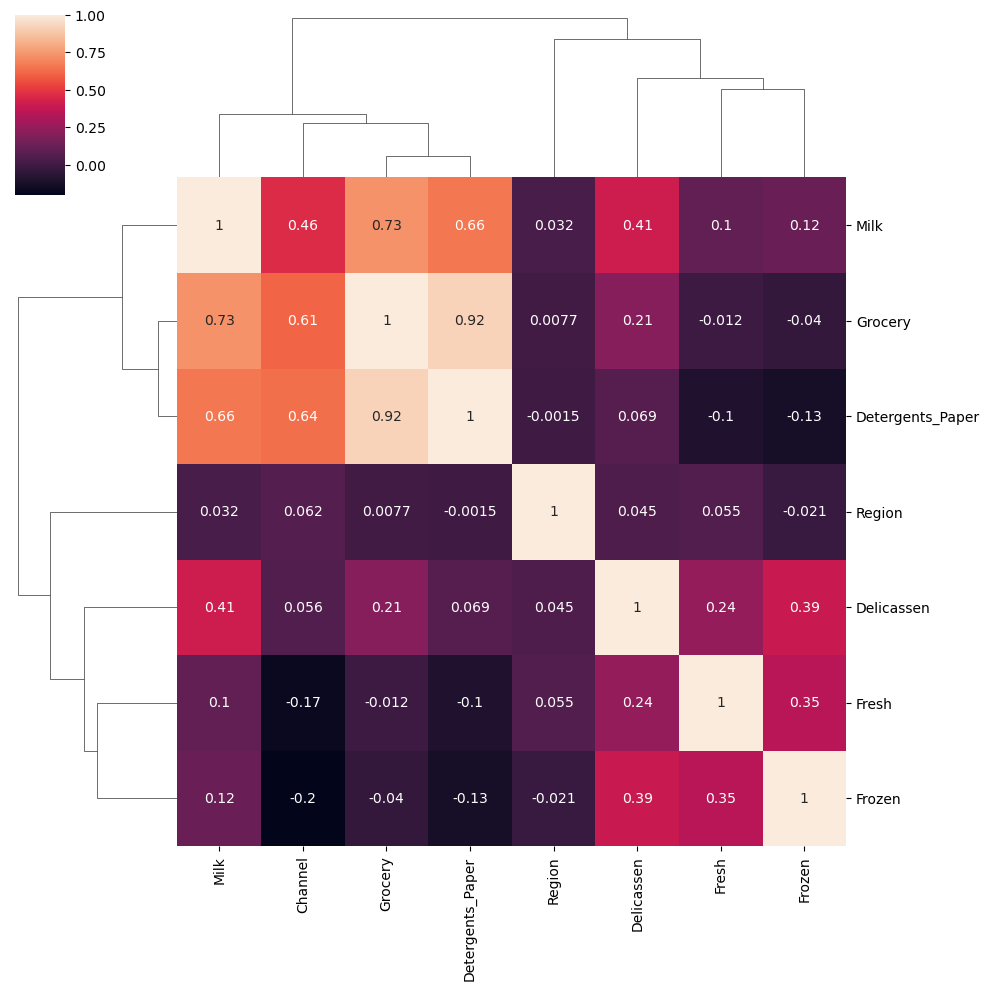

In [14]:
sns.clustermap(data=df.corr()[1:], annot=True)

**Построим график PairPlot для всех колонок датафрейма.**

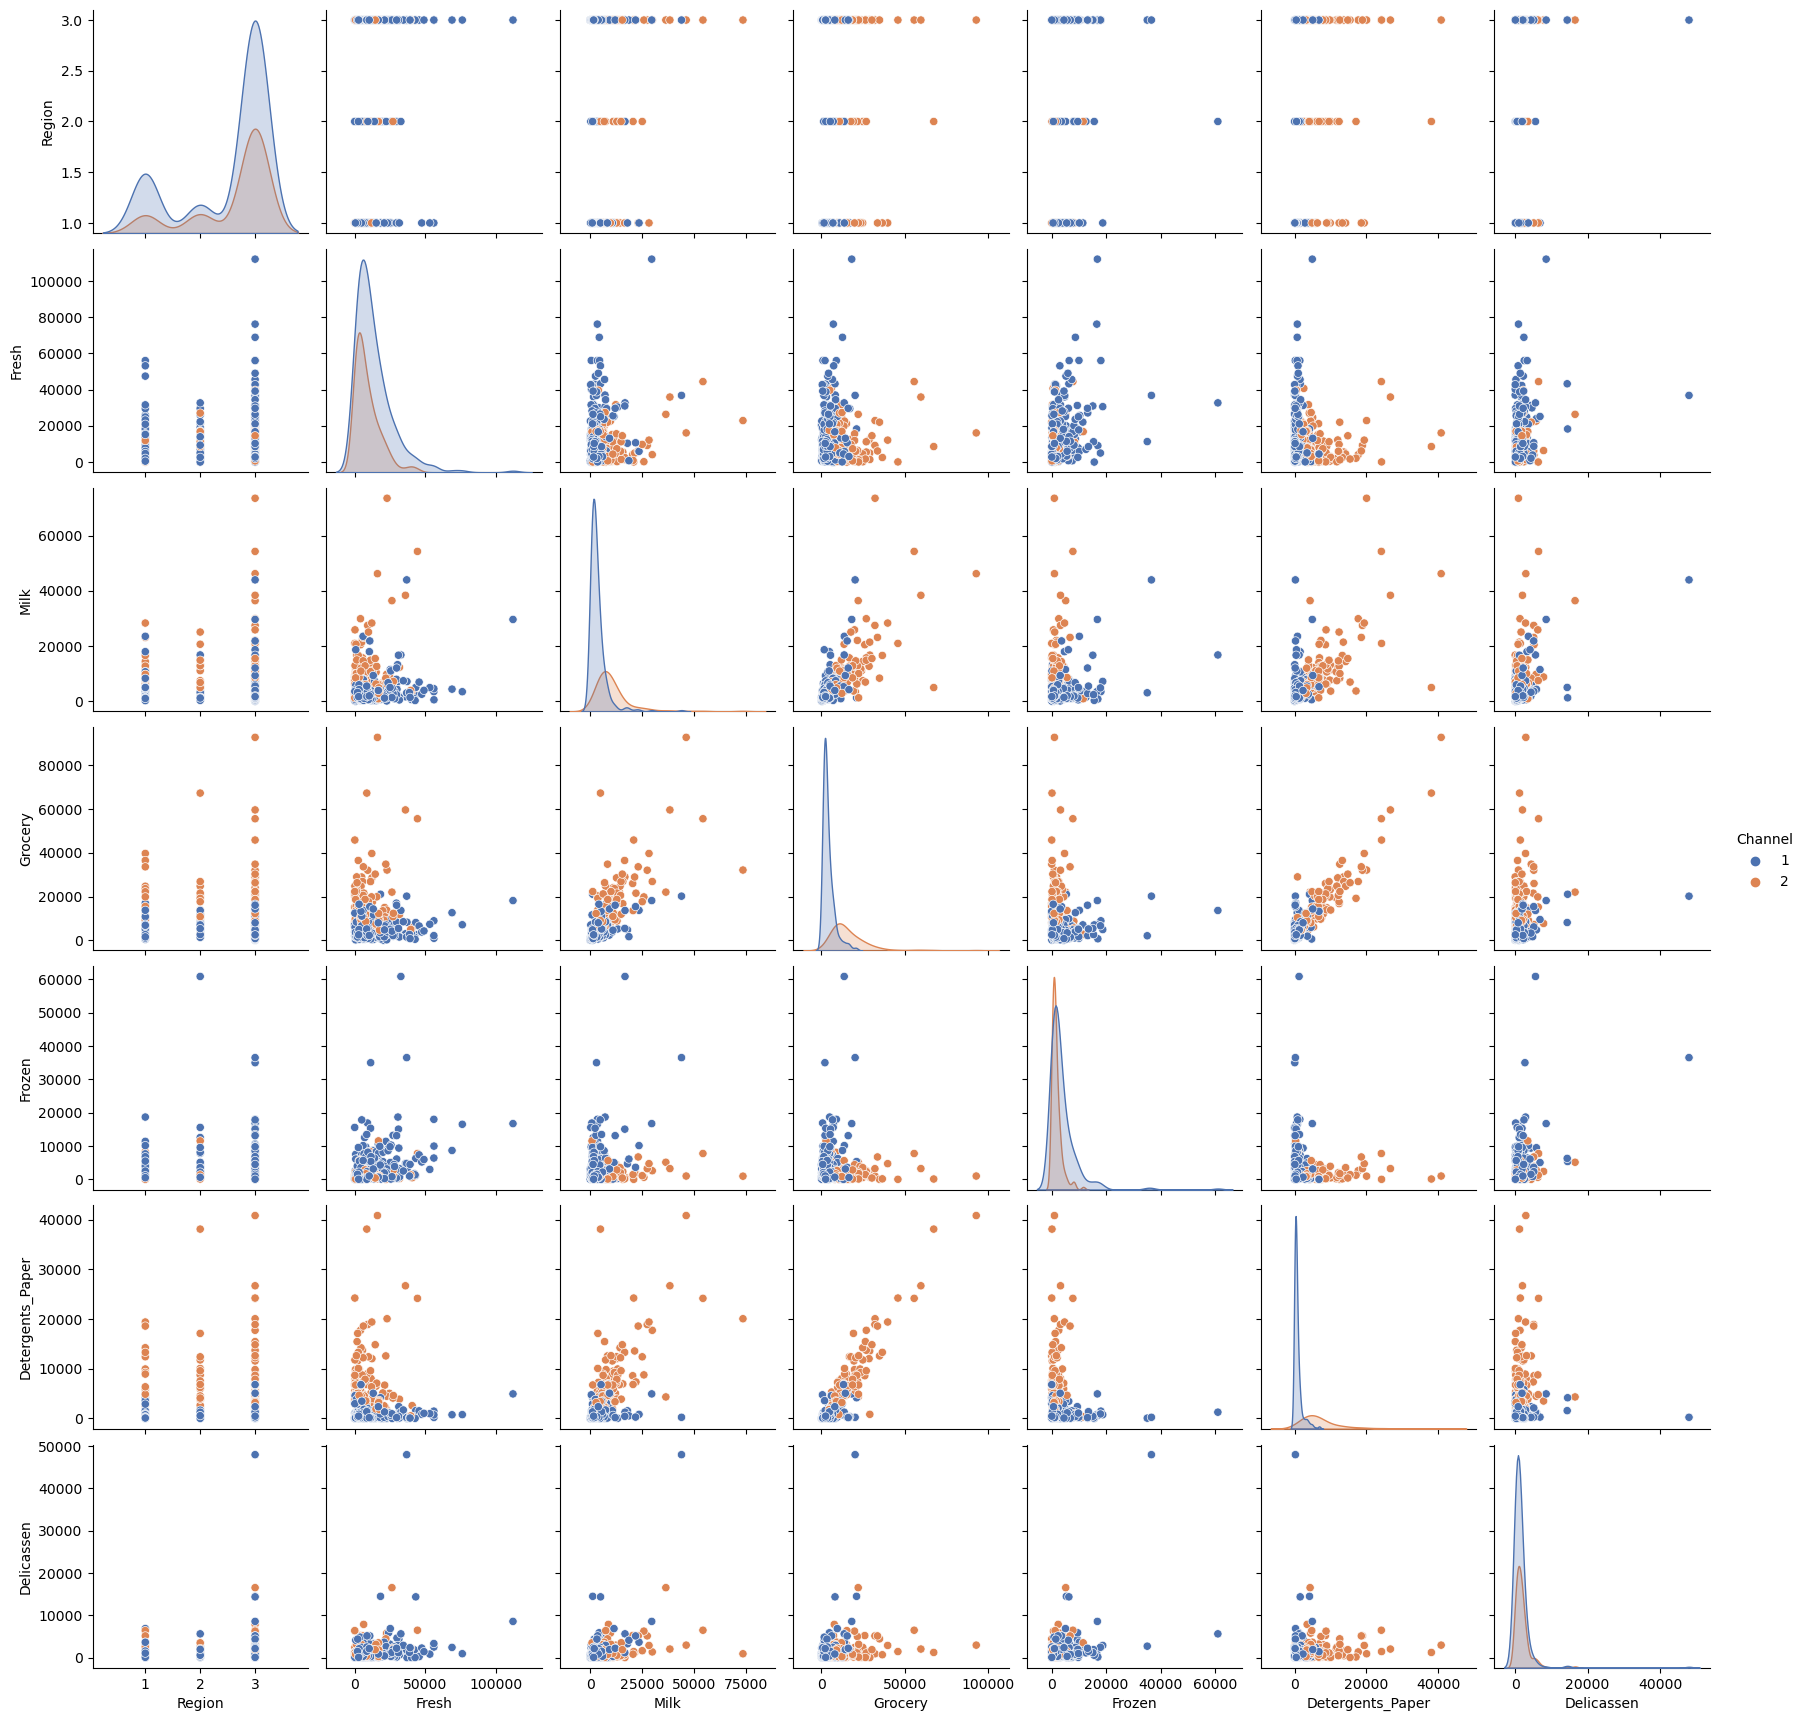

In [17]:
sns.pairplot(data=df, hue='Channel',palette='deep')

## DBSCAN

**Поскольку значения разных признаков имеют разные масштабы единиц измерения, выполним масштабирование данных с помощью StandardScaler.**

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaler_X = scaler.fit_transform(df)

In [24]:
scaler_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

**С помощью DBSCAN и цикла for создадим набор моделей для различных значений параметра эпсилон. В качестве параметра min_samples возьмите значение 2 умножить на количество признаков. Во время цикла сохраним процент точек-выбросов**

    

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
outlier_percent = []


for eps in np.linspace(0.001,3,50):
    dbscan = DBSCAN(eps=eps,min_samples=2*scaler_X.shape[1])
    dbscan.fit(scaler_X)

    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

**Построим график lineplot для процента точек-выбросов в зависимости от значений эпсилон.**

Text(0.5, 0, 'Epsilon Value')

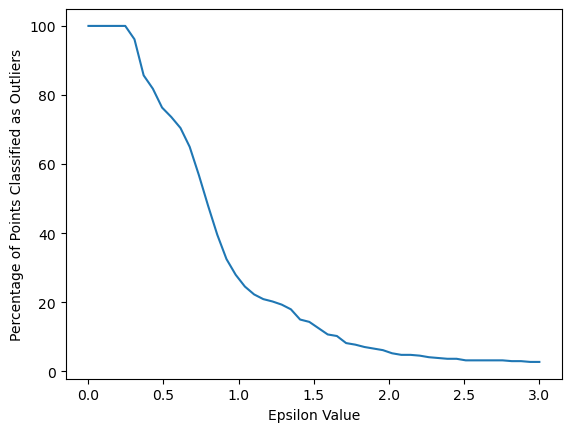

In [47]:
sns.lineplot(x=np.linspace(0.001,3,50), y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel('Epsilon Value')


**Создадим модель DBSCAN с выбранным Вами значением эпсилон.**

In [49]:
dbscan = DBSCAN(eps=2)
dbscan.fit(scaler_X)

DBSCAN(eps=2)

**Построим график scatterplot для колонок Milk и Grocery, раскрашивая данные разными цветами по результатам работы модели DBSCAN.**

<Axes: xlabel='Grocery', ylabel='Milk'>

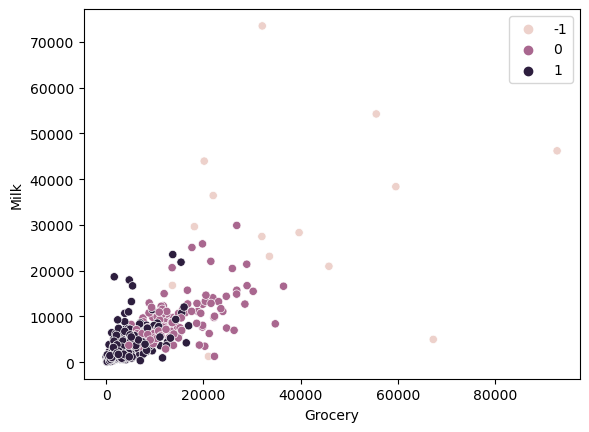

In [50]:
sns.scatterplot(data=df, x='Grocery', y='Milk', hue=dbscan.labels_)


**Построим график scatterplot для колонок Milk и Detergents Paper, раскрашивая данные разными цветами по результатам работы модели DBSCAN.**

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

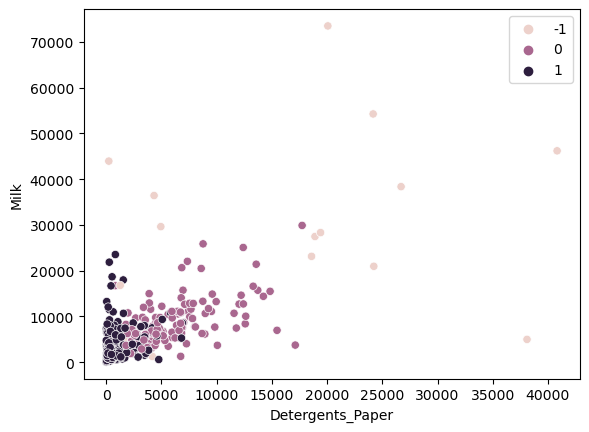

In [51]:
sns.scatterplot(data=df, x='Detergents_Paper', y='Milk', hue=dbscan.labels_)


**Создадим новую колонку в исходном датафрейме, назову эту колонку "Labels" и запишу в неё результаты работы модели DBSCAN - значения labels.**

In [52]:
df['Labels'] = dbscan.labels_


In [53]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


**Вычислим средние значения расходов по различных категорий, причём отдельно для каждого из кластеров (включая кластер -1 для выбросов). Сравним расходы разных кластеров между собой (по отдельным категориям расходов).**

In [57]:
cats = df.drop(['Channel', 'Region'], axis=1)

In [58]:
cat_means = cats.groupby('Labels').mean()

In [59]:
cat_means.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


**Выполним нормализацию таблицы с данными, полученной в предыдущей колонке, с помощью MinMaxScaler - чтобы значения менялись в диапазоне от 0 до 1. После этого построим тепловую карту heatmap для получившихся значений.**

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaled = MinMaxScaler()
data = scaled.fit_transform(cat_means)
scaled_means = pd.DataFrame(data,cat_means.index,cat_means.columns)

In [66]:
scaled_means.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.239292,0.341011,0.000000,0.380758,0.059938
1,0.203188,0.000000,0.000000,0.156793,0.000000,0.000000


<Axes: ylabel='Labels'>

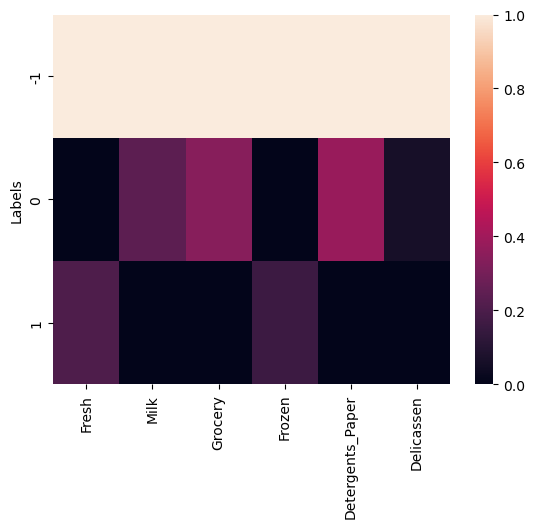

In [67]:
sns.heatmap(data=scaled_means)

**Построим ещё одну тепловую карту - такую же, как и в предыдущем задании, но на этот раз предварительно удалим выбросы из рассмотрения.**

<Axes: ylabel='Labels'>

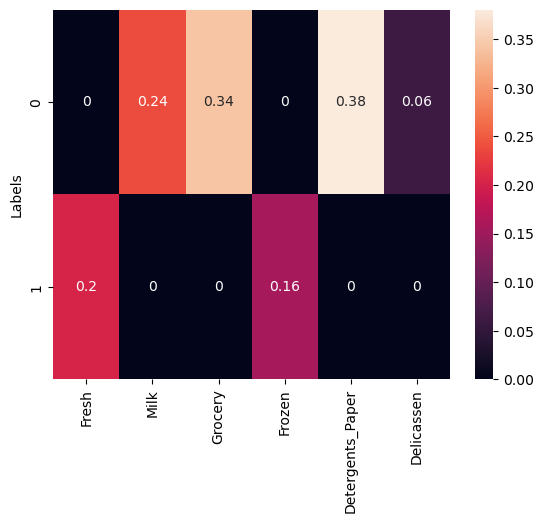

In [71]:
sns.heatmap(data=scaled_means.loc[[0,1]], annot=True)

In [126]:
"""Из полученных результаов тепловой карты можно предположить, что два кластера различаются наиболее заметно 
в категориях с наивысшими относительными значениями. 
Рассмотрим строки и столбцы, где значения наибольшие в каждом кластере:

Первый кластер (первая строка):

Наибольшее значение: 0.38 в пятой категории.
Второй кластер (вторая строка):

Наибольшее значение: 0.2 в первой категории.
Таким образом, кажется, что наиболее заметные различия между этими двумя кластерами 
проявляются 
в пятой категории для первого кластера и в первой категории для второго кластера. 
Эти категории могут быть ключевыми для понимания, в каких областях происходят 
значительные различия в расходах между двумя кластерами.

"""


